In [49]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows=6)

In [28]:
set.seed(1)
#reading the dataset from the URL
heart_disease_data <- read_csv("https://raw.githubusercontent.com/QiXu2022/dsci-100-project-Group_66/main/heart_disease_uci.csv")
heart_disease_data

Rows: 920 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): sex, dataset, cp, restecg, slope, thal
dbl (8): id, age, trestbps, chol, thalch, oldpeak, ca, num
lgl (2): fbs, exang

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,63,Male,Cleveland,typical angina,145,233,TRUE,lv hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160,286,FALSE,lv hypertrophy,108,TRUE,1.5,flat,3,normal,2
3,67,Male,Cleveland,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,2,reversable defect,1
4,37,Male,Cleveland,non-anginal,130,250,FALSE,normal,187,FALSE,3.5,downsloping,0,normal,0
5,41,Female,Cleveland,atypical angina,130,204,FALSE,lv hypertrophy,172,FALSE,1.4,upsloping,0,normal,0
6,56,Male,Cleveland,atypical angina,120,236,FALSE,normal,178,FALSE,0.8,upsloping,0,normal,0
7,62,Female,Cleveland,asymptomatic,140,268,FALSE,lv hypertrophy,160,FALSE,3.6,downsloping,2,normal,3
8,57,Female,Cleveland,asymptomatic,120,354,FALSE,normal,163,TRUE,0.6,upsloping,0,normal,0
9,63,Male,Cleveland,asymptomatic,130,254,FALSE,lv hypertrophy,147,FALSE,1.4,flat,1,reversable defect,2


In [29]:
#tidying the data
tidy_data<-heart_disease_data |>
    filter(dataset=="Cleveland") |>
    select(age, trestbps, chol, restecg, num) 
tidy_data

age,trestbps,chol,restecg,num
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
63,145,233,lv hypertrophy,0
67,160,286,lv hypertrophy,2
67,120,229,lv hypertrophy,1
37,130,250,normal,0
41,130,204,lv hypertrophy,0
56,120,236,normal,0
62,140,268,lv hypertrophy,3
57,120,354,normal,0
63,130,254,lv hypertrophy,2


In [40]:
#splitting the data to use the training set
heart_split<- initial_split(tidy_data, prop=0.75, strata=num)
heart_train<-training(heart_split)
heart_train

heart_test<-testing(heart_split)

age,trestbps,chol,restecg,num
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
37,130,250,normal,0
41,130,204,lv hypertrophy,0
56,120,236,normal,0
57,140,192,normal,0
44,120,263,normal,0
52,172,199,normal,0
57,150,168,normal,0
48,130,275,normal,0
64,110,211,lv hypertrophy,0


In [41]:
#check for how many number of observations and missing data
heart_recipe <- recipe(num~., data=tidy_data) |>
    prep()
heart_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Training data contained 304 data points and no missing data.

In [42]:
#summary tables of training dataset
summary(heart_train)

str(heart_train)

      age           trestbps          chol         restecg         
 Min.   :28.00   Min.   : 94.0   Min.   :126.0   Length:226        
 1st Qu.:47.00   1st Qu.:120.0   1st Qu.:209.2   Class :character  
 Median :55.00   Median :130.0   Median :243.0   Mode  :character  
 Mean   :54.22   Mean   :131.5   Mean   :245.1                     
 3rd Qu.:61.00   3rd Qu.:140.0   3rd Qu.:274.0                     
 Max.   :77.00   Max.   :200.0   Max.   :564.0                     
      num        
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.9027  
 3rd Qu.:2.0000  
 Max.   :4.0000  

tibble [226 × 5] (S3: tbl_df/tbl/data.frame)
 $ age     : num [1:226] 37 41 56 57 44 52 57 48 64 60 ...
 $ trestbps: num [1:226] 130 130 120 140 120 172 150 130 110 130 ...
 $ chol    : num [1:226] 250 204 236 192 263 199 168 275 211 206 ...
 $ restecg : chr [1:226] "normal" "lv hypertrophy" "normal" "normal" ...
 $ num     : num [1:226] 0 0 0 0 0 0 0 0 0 4 ...


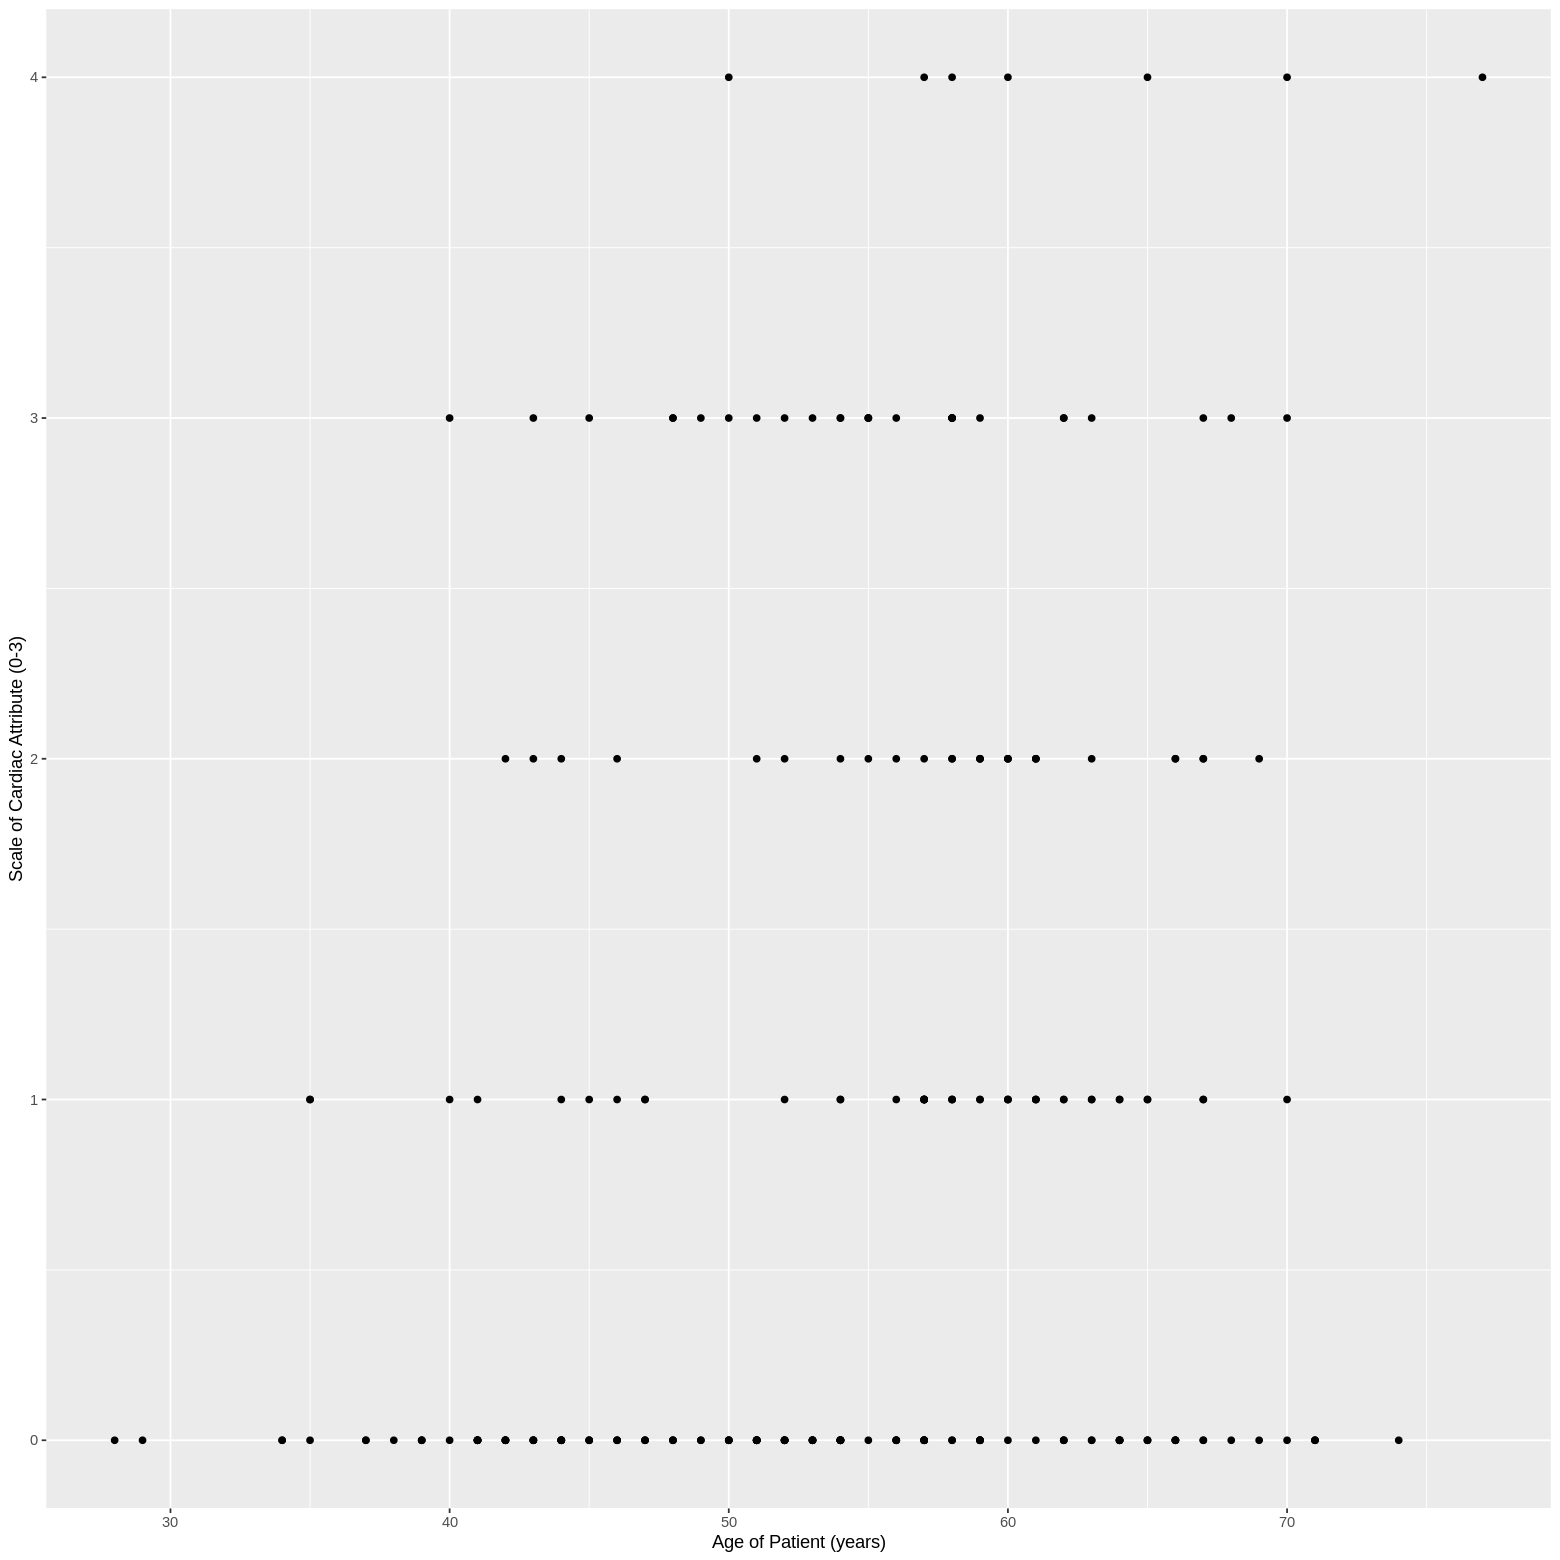

In [59]:
#preliminary exploration plot
options(repr.plot.width=13, repr.plot.height=13)

prelim_age_plot <- heart_train |>
    ggplot(aes(x=age, y=num)) +
    geom_point() +
    labs(x="Age of Patient (years)", y="Scale of Cardiac Attribute (0-3)")
    theme_text=(element_text(size=20))
prelim_age_plot